# Problem 1 - (15 marks)

In this task you need predict the risk class of a car driver based on the following attributes:

| Attribute | Description | Values |
| :--- | :--- | :--- |
| time | time since obtaining a drivers license in years | $\{1-2,2-7,>7\}$ |
| gender | gender | $\{$ male, female $\}$ |
| area | residential area | $\{$ urban, rural $\}$ |
| risk | the risk class | $\{$ low, high $\}$ |

For your analysis you have the following training examples:




| ID | time | gender | area | risk |
| :---: | :---: | :---: | :---: | :---: |
| 1 | $1 - 2$ | $\mathrm{~m}$ | urban | low |
| 2 | $2-7$ | $\mathrm{~m}$ | rural | high |
| 3 | $>7$ | $\mathrm{f}$ | rural | low |
| 4 | $1-2$ | $\mathrm{f}$ | rural | high |
| 5 | $>7$ | $\mathrm{~m}$ | rural | high |
| 6 | $1-2$ | $\mathrm{~m}$ | rural | high |
| 7 | $\mathrm{~m}$ | $\mathrm{f}$ | urban | low |
| 8 | $2-7$ | $\mathrm{~m}$ | urban | low |

This data has been stored into a Pandas dataframe using the code below. 

In [ ]:
data = '''ID	time	gender	area	risk
1	1-2	m	urban	low
2	2-7	m	rural	high
3	> 7	f	rural	low
4	1-2	f	rural	high
5	> 7	m	rural	high
6	1-2	m	rural	high
7	m	f	urban	low
8	2-7	m	urban	low'''

lines = data.split('\n')

data = [line.split('\t') for line in lines]

import pandas as pd

df = pd.DataFrame(data[1:], columns=data[0]).set_index('ID')

In [ ]:
df.head()

,time,gender,area,risk
ID,,,,
1,1-2,m,urban,low
2,2-7,m,rural,high
3,> 7,f,rural,low
4,1-2,f,rural,high
5,> 7,m,rural,high


## Task 1 - 12 marks

Manually construct a decision tree based on this training data. This means that you cannot use any prebuilt decision tree models from packages such as sci-kit learn. Instead you need to manually write functions in Python to fit the decision tree model on the training data above. 

When splitting, use the cross-entropy loss to decide which split is best. Stop splitting once all instances in the branch have the same class. 

**Recall:** When splitting a parent region $R_p$ by feature $X_j$ into child regions $R^j_{1}, R^j_{2}$, we have

$$
\begin{aligned}
\operatorname{Loss}_{\operatorname{cross}}(R) & =-\sum_{i=1}^{k} p_{i} \cdot \log p_{i} 
\end{aligned}
$$
and we want to minimise the 'averaged' loss over the two regions:

$$
\frac{\left|R^j_{1}\right|\operatorname{Loss}_{\operatorname{cross}}(R^j_1)+\left|R^j_{2}\right|\operatorname{Loss}_{\operatorname{cross}}(R^j_2)}{|R_p|} 
$$

where $|R|$ denotes the number of elements in region $R$ and $p_i$ is the proportion of data points in class $i$ in region $R$.

In [189]:
import numpy as np

In [191]:
class Node:
    def __init__(self):
        self.attribute = None
        self.threshold = None
        self.left = None
        self.right = None
        self.label = None

def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def split_dataset(dataset, attribute, threshold):
    left_indices = np.where(dataset[:, attribute] <= threshold)[0]
    right_indices = np.where(dataset[:, attribute] > threshold)[0]
    return left_indices, right_indices

def best_split(dataset, labels):
    best_attribute = None
    best_threshold = None
    min_entropy = float('inf')

    for attribute in range(dataset.shape[1]):
        values = np.unique(dataset[:, attribute])
        for threshold in values:
            left_indices, right_indices = split_dataset(dataset, attribute, threshold)
            left_labels, right_labels = labels[left_indices], labels[right_indices]

            left_entropy = entropy(left_labels)
            right_entropy = entropy(right_labels)
            total_entropy = (len(left_labels) / len(labels)) * left_entropy + (len(right_labels) / len(labels)) * right_entropy

            if total_entropy < min_entropy:
                min_entropy = total_entropy
                best_attribute = attribute
                best_threshold = threshold

    return best_attribute, best_threshold

def build_tree(dataset, labels):
    node = Node()
##To stop the splitting when all instances in the branch have the same class
    if len(np.unique(labels)) == 1:
        node.label = labels[0]
        return node

    best_attribute, best_threshold = best_split(dataset, labels)

    if best_attribute is None or best_threshold is None:
        node.label = np.argmax(np.bincount(labels))
        return node

    left_indices, right_indices = split_dataset(dataset, best_attribute, best_threshold)
    left_dataset, left_labels = dataset[left_indices], labels[left_indices]
    right_dataset, right_labels = dataset[right_indices], labels[right_indices]

    node.attribute = best_attribute
    node.threshold = best_threshold
    node.left = build_tree(left_dataset, left_labels)
    node.right = build_tree(right_dataset, right_labels)

    return node

def predict(node, instance):
    if node.label is not None:
        return node.label

    if instance[node.attribute] <= node.threshold:
        return predict(node.left, instance)
    else:
        return predict(node.right, instance)

### Task 2  - 3 marks

Apply the decision tree to the following drivers and present the prediction of these drives.

| ID | time | gender | area |
| :---: | :---: | :---: | :---: |
| A | $1-2$ | $\mathrm{f}$ | rural |
| B | $2-7$ | $\mathrm{~m}$ | urban |
| $\mathrm{C}$ | $1-2$ | $\mathrm{f}$ | urban |

In [203]:
new_data = '''ID time gender area risk
A 1-2 f rural
B 2-7 m urban
C 1-2 f urban'''

liness = new_data.split('\n')
new_data_list = [line.split('\t') for line in liness]

df4 = pd.DataFrame(new_data_list[1:], columns = new_data_list[0])#.set_index('ID')


# Problem 2: (10 marks)

In lab sheet 1 & 2, you developed a model to predict whether a given car gets high or low gas mileage based on the Auto data set. Below is the a url to the data:

In [ ]:
url_auto = 'https://www.statlearning.com/s/Auto.csv'

Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median as you did before. This variable will describe if a car has high or low mileage.

Your task here is to fit some tree-based models to the data and compare these to each other and your previously best model (from lab sheet 1 & 2). Which model across the three lab sheets performs best? 

**In this task you can use sci-kit learn to create your decision tree model**

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

#Import the data
df1 = pd.read_csv('https://www.statlearning.com/s/Auto.csv')
df1

<ipython-input-162-a9cf8a3de575>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [163]:
#Calculate the median of mpg
median = df1['mpg'].median()
median

#Then create the binary variable mpg01
df1['mpg01'] = df['mpg'].apply(lambda x: 1 if x > median else 0)
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


In [164]:
##Fitting a regression tree

X = df1.drop(columns = ["name", "year", "origin", "horsepower", "weight"])
y = df1.mpg01

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [165]:
regr2 = tree.DecisionTreeRegressor()
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

In [166]:
path = regr2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

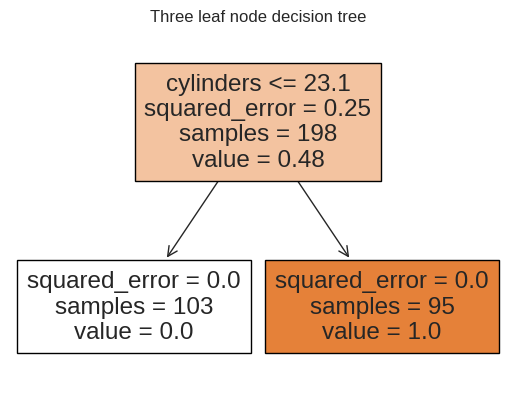

In [167]:
tree.plot_tree(regr2,filled = True,feature_names = ['cylinders','displacement'])
plt.title("Three leaf node decision tree")
plt.show()

In [168]:
mean_squared_error(y_test, pred)

0.0

In [169]:
pred1 = regr2.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,103,0
Yes,0,96


Classification Tree

In [170]:
clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [171]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       191

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



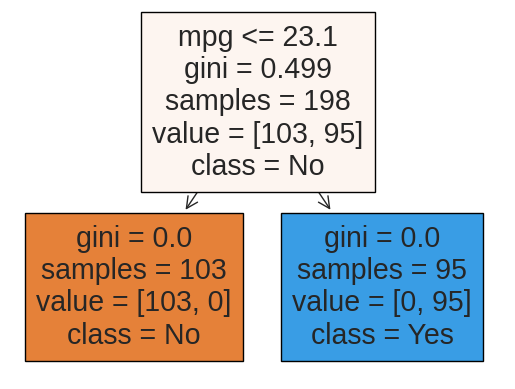

In [151]:
tree.plot_tree(clf,filled = True,class_names = ['No','Yes'],feature_names=X.columns)
plt.show()

In [188]:
pred = clf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,103,0
Yes,0,96


From the previous models from the past two task sheets, when we used cross validation and tuning of just the missclasification constant, we got a cv score of 1 and the best model was the 0.1 model.The accuracy on the test score was 99% (.99). For the second model when we tuned two hyperparameters (missclasification and gamma constant), we got a cv score of 1 and the best model there was the '1' model. The gamma value was 0.5 and the accuracy on the test set was 100% (1.00). From the models in this task sheet, we get an accuracy of 100% from both the Regression tree and the classification tree.

This shows that there is no variance between the regression model and the classification model, and they produce a slightly better performance overall. The accuracy of the twi hyperparameter model from the previous task sheet and the accuracy of both the regression tree and classification tree are 100%.

# Problem 3 - (10 marks)

In this task you need to use Principle Component Analysis to transform the data below into 1-dimension whilst maintain as much variance in the data as possible.  

![original image](https://cdn.mathpix.com/snip/images/9HFLB1qefycZ4vAjbhKmuEaV8JUYhRzGkMlvc4_SoIM.original.fullsize.png)


Please describe how much of the variation in the data is maintained after the transformation. 

The data above is stored in a spreadsheet called 'Data' and is avaliable on Moodle in the 'Lab Sheets' section. 


In [173]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving Data.xlsx to Data (1).xlsx


In [174]:
data = pd.read_excel('Data.xlsx')
data

,Unnamed: 0,x1,x2
0,0,-2.064535,1.016062
1,1,1.851701,2.236903
2,2,-4.678788,-3.689600
3,3,-2.509525,-1.052454
4,4,-1.902626,0.214783
5,5,2.111144,1.496697
6,6,-0.390314,-0.009339
7,7,-2.118336,-0.945417
8,8,-1.756331,-0.756562
9,9,0.717711,-0.585228


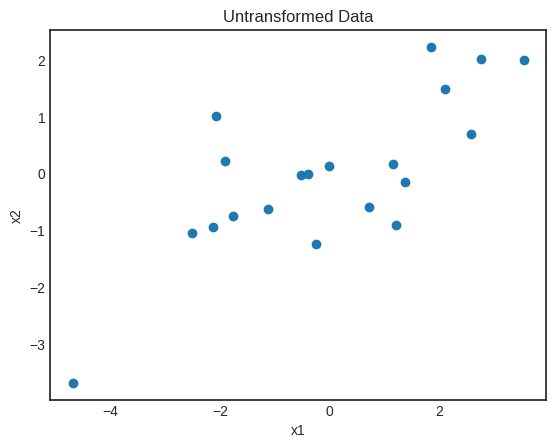

In [180]:
plt.scatter(data['x1'], data['x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Untransformed Data')
plt.show()

Now, implement the PCA

In [107]:
from sklearn.decomposition import PCA

data = pd.DataFrame(data)

# Create PCA instance and fit the data
pca = PCA(n_components=1)
pca.fit(data)

# Transform the data into one dimension
transformed_data = pca.transform(data)

# Create a new dataframe for transformed data
transformed_df = pd.DataFrame(transformed_data, columns=['Transformed'])

# Print the transformed dataframe
print(transformed_df)


    Transformed
0      9.699035
1      8.155222
2      8.081116
3      6.788454
4      5.714975
5      4.157428
6      3.519921
7      2.773685
8      1.732784
9      0.391738
10    -0.690732
11    -1.874052
12    -2.973966
13    -3.830687
14    -4.627078
15    -5.443305
16    -6.597435
17    -7.350266
18    -8.256116
19    -9.370721


Now, visualize the transformed data

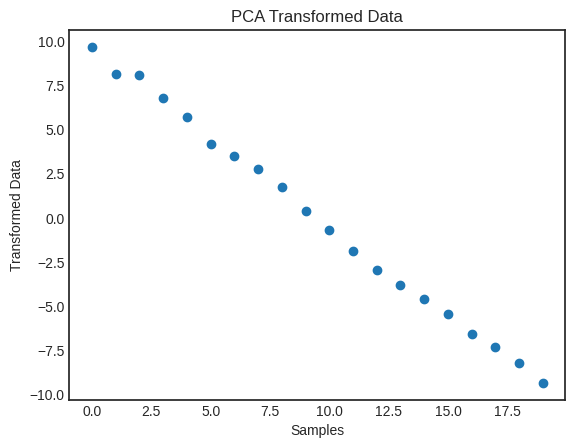

In [108]:
import matplotlib.pyplot as plt
plt.scatter(transformed_df.index, transformed_df['Transformed'])
plt.xlabel('Samples')
plt.ylabel('Transformed Data')
plt.title('PCA Transformed Data')
plt.show()

It can be observed from above that there is little variation retained. From the untransformed data, the slope was on a positive axis, whilst on the transformed data, the slope will give a negative value. There is also a slightly similar linearity observed from both models (before and after transformation).

# Problem 4 - 15 marks

## Task 1 - 10 marks

In this task you need to implement the KMeans algorithm in Python manually. This means you cannot used any prebuilt implementation of the algorithm from packages such as sci-kit learn. Instead you need to write functions to implement the following algorithm:

1. Initialize `k` cluster centroids randomly.
2. Assign each data point to its nearest cluster centroid.
3. Update the cluster centroids to be the mean of the data points assigned to each cluster.
4. Repeat steps 2 and 3 until convergence (when the cluster assignments no longer change).

In [181]:
def initialize_centroids(data, k):
    # Randomly initialize k cluster centroids
    centroids_indices = np.random.choice(range(data.shape[0]), size=k, replace=False)
    centroids = data[centroids_indices]
    return centroids


def assign_clusters(data, centroids):
    # Assign each data point to its nearest cluster centroid
    distances = np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
    cluster_assignments = np.argmin(distances, axis=0)
    return cluster_assignments


def update_centroids(data, cluster_assignments, k):
    # Update the cluster centroids to be the mean of the data points assigned to each cluster
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_data = data[cluster_assignments == i]
        if len(cluster_data) > 0:
            centroids[i] = np.mean(cluster_data, axis=0)
    return centroids


def kmeans(data, k):
    # Initialize cluster centroids
    centroids = initialize_centroids(data, k)

    # Iterate until convergence
    while True:
        # Assign data points to clusters
        cluster_assignments = assign_clusters(data, centroids)

        # Update cluster centroids
        new_centroids = update_centroids(data, cluster_assignments, k)

        # Check for convergence
        if np.array_equal(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, cluster_assignments



## Task 2 - 2 marks

Apply the KMeans algorithm you implemented to the dataset `x` below with `k=2` clusters.

In [182]:
x = np.array([ [1, 2], [1, 4], [1, 0],
      [4, 2], [4, 4], [4, 0]])

k = 2

centroids, cluster_assignments = kmeans(x, 2)

print("Final cluster centroids:")
print(centroids)
print("Cluster assignments:")
print(cluster_assignments)

Final cluster centroids:
[[4. 2.]
 [1. 2.]]
Cluster assignments:
[1 1 1 0 0 0]


## Task 3 - 2 marks

Plot the resulting clusters in a scatter plot, with each cluster assigned a different color.

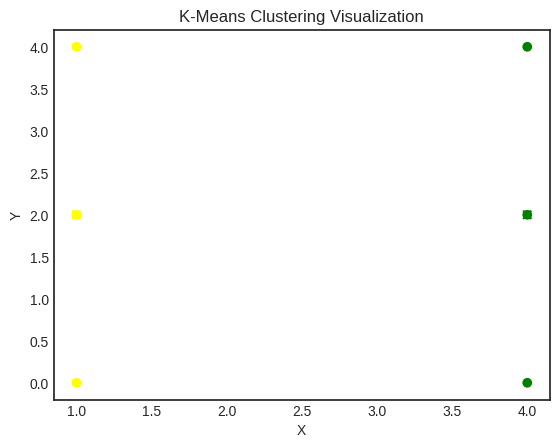

In [183]:
colors = ['green', 'yellow']
cluster_colors = [colors[cluster] for cluster in cluster_assignments]

# Plotting the data points with different colors for each cluster
plt.scatter(x[:, 0], x[:, 1], c=cluster_colors)
plt.scatter(centroids[:, 0], centroids[:, 1], c=colors, marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering Visualization')
plt.show()

## Task 4 - 1 mark

Comment on the results of your clustering. Are the resulting clusters reasonable? Do they match your expectations?


From the above results, the clustering appears to be very accurate. There is a clear variance between datapoints of the two clusters, and subsequently match the expected results.